
#**Clustering Analysis**

Data Preprocessing:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel file
excel_file = 'EastWestAirlines.xlsx'

# Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'data']


In [ ]:
# Load the "Data" sheet
df= pd.read_excel(excel_file, sheet_name="data")

In [ ]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(3999, 12)

In [ ]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [130]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [136]:
# Remove outliers using IQR method (after converting to numeric)
Q1 = df.quantile(0.25, numeric_only=True) # Ensure only numeric columns are considered
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Align Q1 and Q3 with df's columns before comparison
Q1 = Q1.reindex(df.columns)
Q3 = Q3.reindex(df.columns)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR)

ID#                   1970.0
Balance              50705.5
Qual_miles               0.0
cc1_miles                2.0
cc2_miles                0.0
cc3_miles                0.0
Bonus_miles          16589.0
Bonus_trans             13.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     3411.5
Award?                   1.0
dtype: float64


In [145]:
# Scale the features
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()

# Define numeric_cols
numeric_cols = df.select_dtypes(include=np.number).columns # Select numeric columns

# Only scale numeric features
scaled_features = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols, index=df.index)
print("df_scaled")
print(numeric_cols)


df_scaled
Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [141]:
# Scale the features
scaler = StandardScaler()
# Only scale numeric features
scaled_features = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols, index=df.index)
print("df_scaled")


df_scaled


In [147]:
# standardize data using minmax

from sklearn.preprocessing import MinMaxScaler

# Assuming df2 is your DataFrame without outliers and unnecessary columns
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now df2 contains the standardized data
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.198067,0.0,0.0,0.0,0.0,0.004157,0.029412,0.0,0.0,0.843629,0.0
1,0.000249,0.135285,0.0,0.0,0.0,0.0,0.005137,0.058824,0.0,0.0,0.839768,0.0
2,0.000498,0.291270,0.0,0.0,0.0,0.0,0.098509,0.117647,0.0,0.0,0.847732,0.0
3,0.000746,0.103764,0.0,0.0,0.0,0.0,0.011946,0.029412,0.0,0.0,0.837838,0.0
5,0.001244,0.115362,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836631,0.0


In [148]:
 #1. Summary Statistics
print(df.describe())

               ID#      Balance  Qual_miles    cc1_miles  cc2_miles  \
count  2226.000000  2226.000000      2226.0  2226.000000     2226.0   
mean      0.538902     0.262140         0.0     0.217880        0.0   
std       0.289153     0.225903         0.0     0.336239        0.0   
min       0.000000     0.000000         0.0     0.000000        0.0   
25%       0.292600     0.089077         0.0     0.000000        0.0   
50%       0.557090     0.189665         0.0     0.000000        0.0   
75%       0.795958     0.373690         0.0     0.333333        0.0   
max       1.000000     1.000000         0.0     1.000000        0.0   

       cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count     2226.0  2226.000000  2226.000000             2226.0   
mean         0.0     0.195694     0.246921                0.0   
std          0.0     0.250192     0.216990                0.0   
min          0.0     0.000000     0.000000                0.0   
25%          0.0     0.006242     0

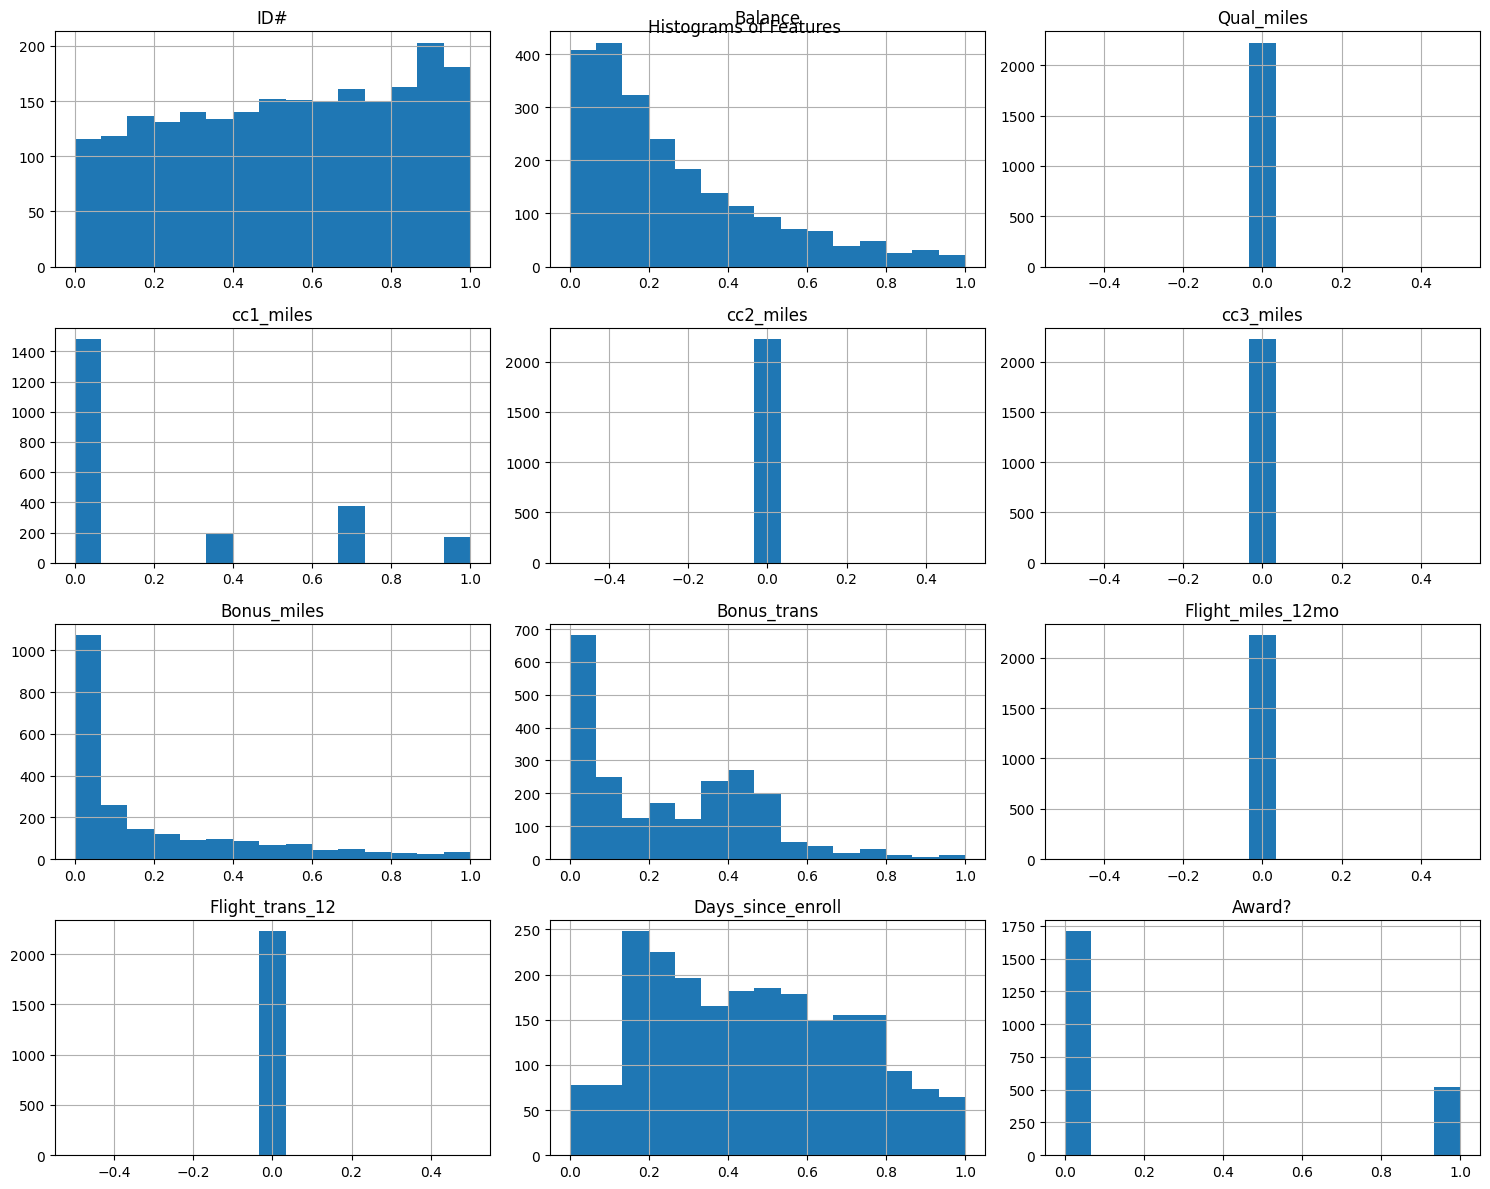

In [150]:
# 2. Histograms for each feature
df.hist(figsize=(15, 12), bins=15)
plt.tight_layout()
plt.suptitle("Histograms of Features")
plt.show()

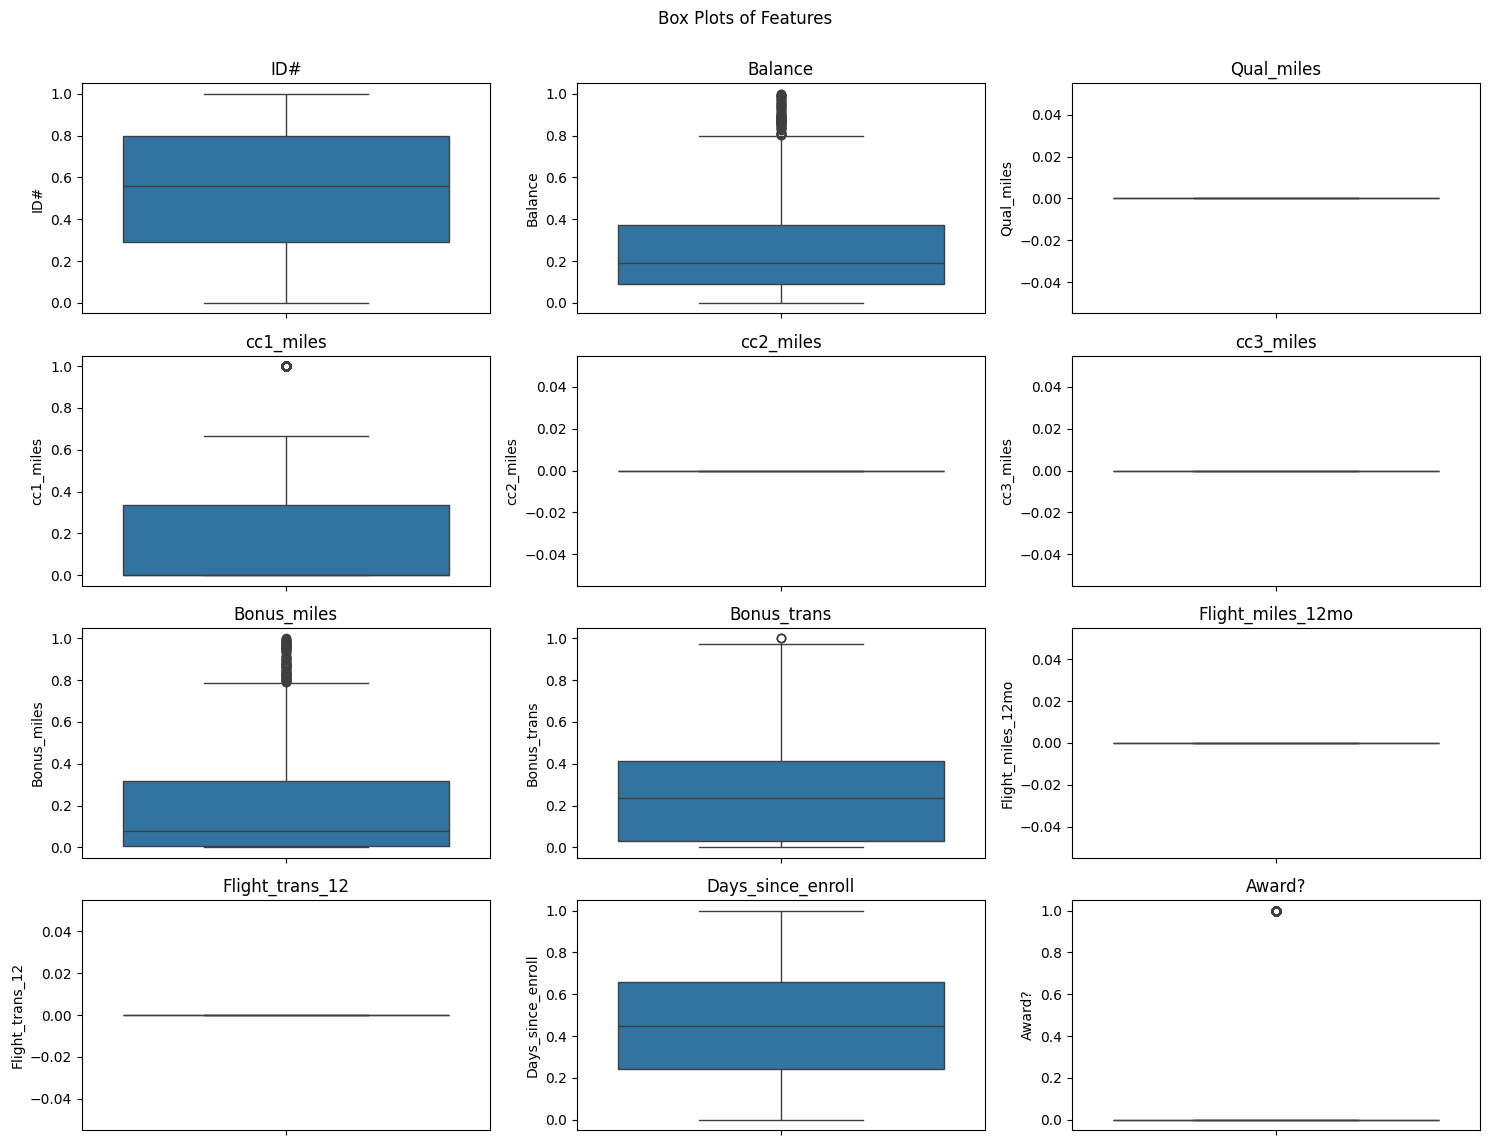

In [151]:
# 3. Box plots to visualize distributions and identify outliers (if any remain)
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Box Plots of Features')
plt.show()

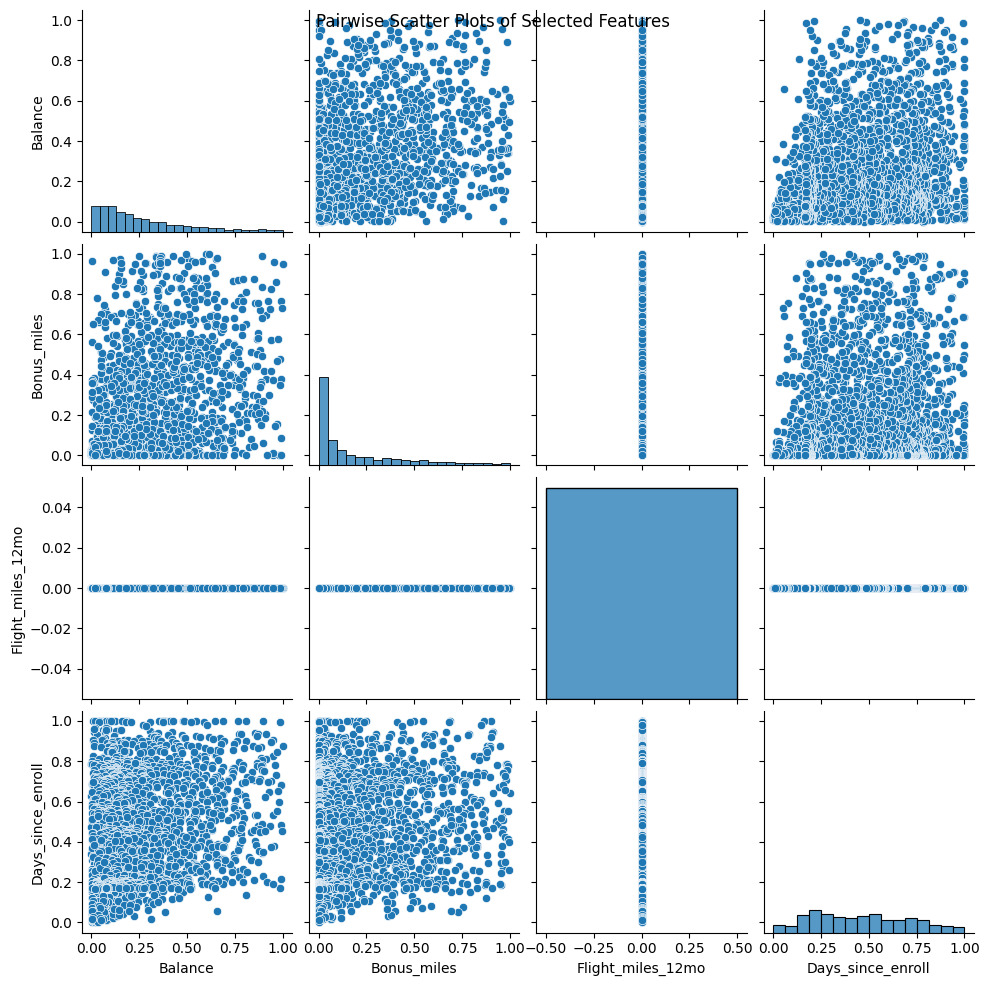

In [152]:
# 4. Pairwise scatter plots to visualize relationships between features
# Choose a subset of features for better visualization, especially if you have many features
selected_features = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
sns.pairplot(df[selected_features])
plt.suptitle("Pairwise Scatter Plots of Selected Features")
plt.show()

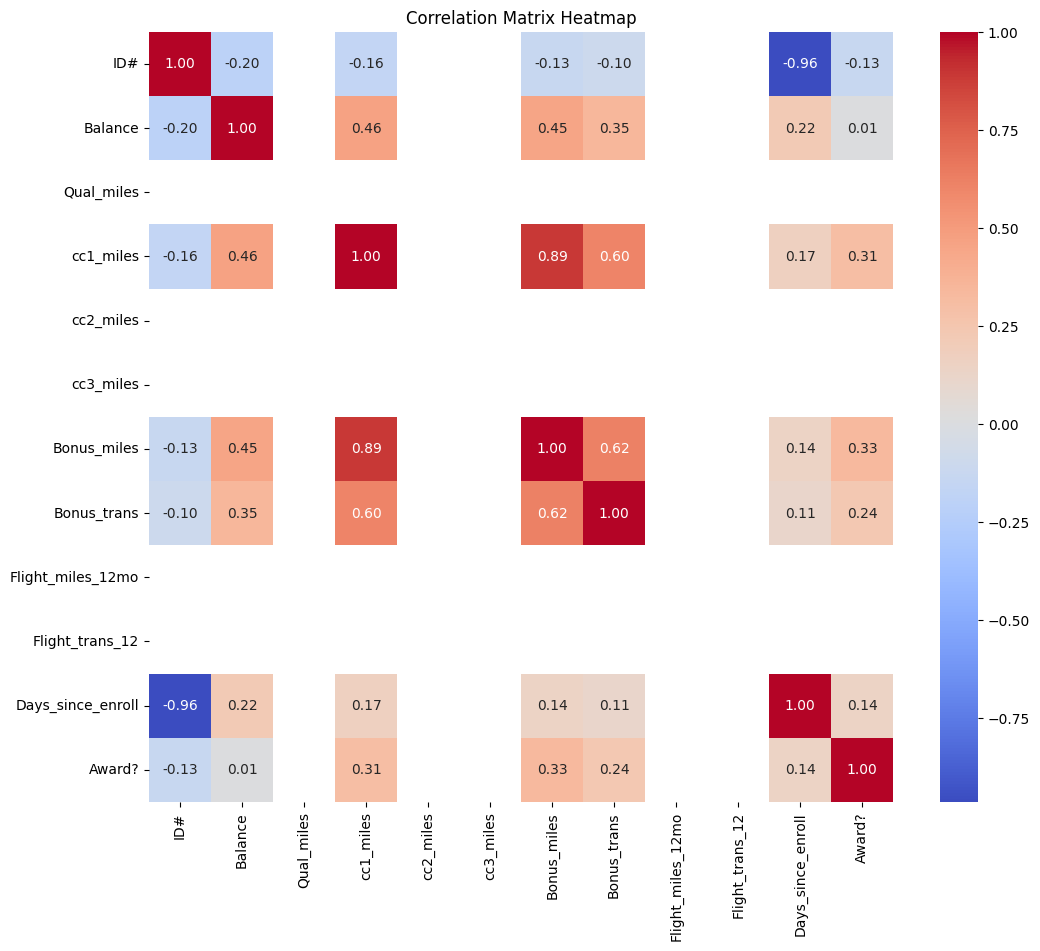

In [153]:
# 5. Correlation Matrix Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

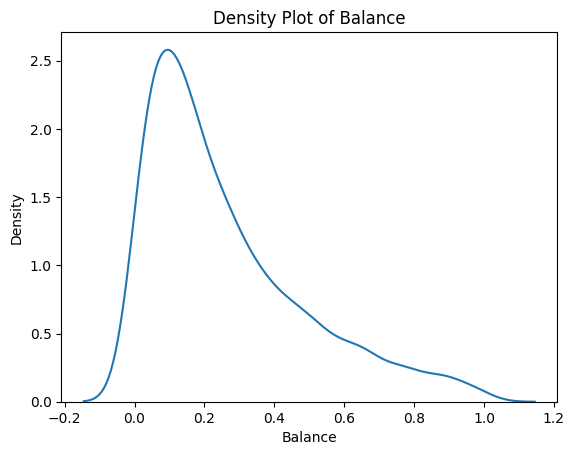

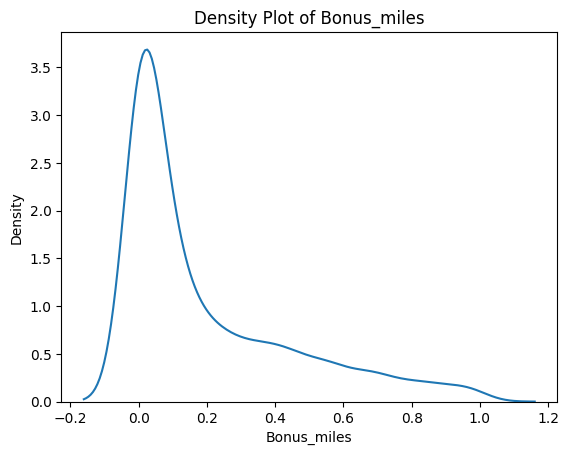

<ipython-input-154-1af09c868fe4>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


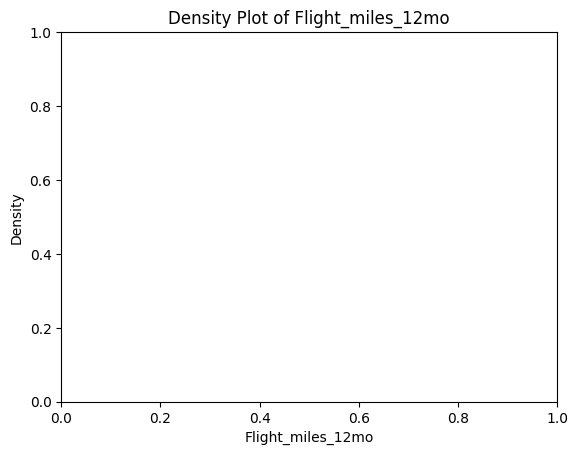

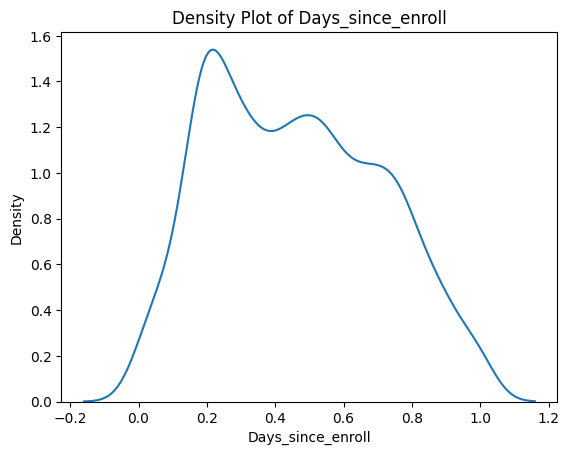

In [154]:
# 6. Analyze distributions using density plots for selected features.
for col in selected_features:
    sns.kdeplot(df[col])
    plt.title(f'Density Plot of {col}')
    plt.show()

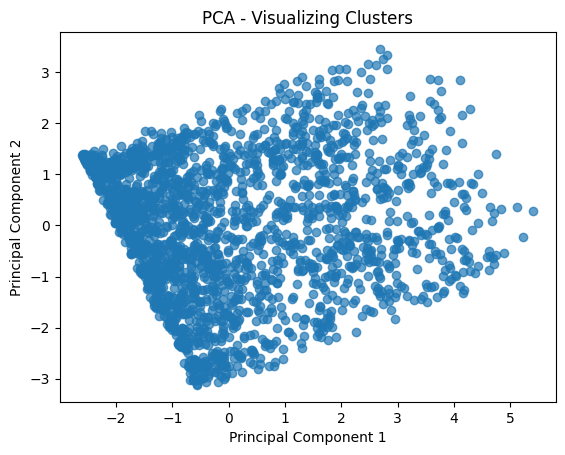

In [158]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)

# Use df_scaled instead of scaled_df
pca_df = pca.fit_transform(df_scaled)

# Scatter plot of first 2 principal components
plt.scatter(pca_df[:, 0], pca_df[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Visualizing Clusters")
plt.show()

# Hierarchical Clustering

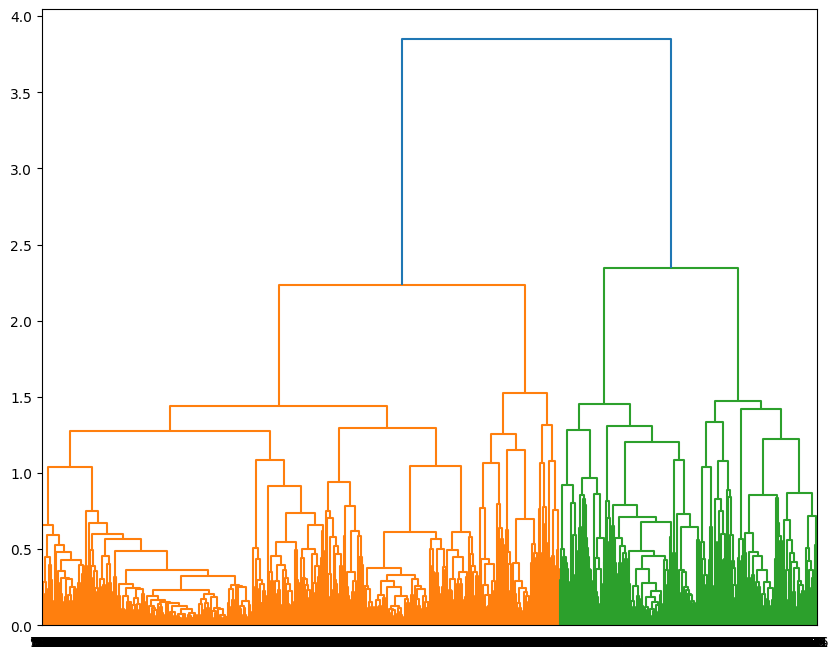

In [181]:
#Hierarchical Clustering using average
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

z=linkage(df,method='average',metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [182]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',metric = "euclidean").fit(df)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000000,0.198067,0.0,0.000000,0.0,0.0,0.004157,0.029412,0.0,0.0,0.843629,0.0,1.0
1,0.000249,0.135285,0.0,0.000000,0.0,0.0,0.005137,0.058824,0.0,0.0,0.839768,0.0,1.0
2,0.000498,0.291270,0.0,0.000000,0.0,0.0,0.098509,0.117647,0.0,0.0,0.847732,0.0,1.0
3,0.000746,0.103764,0.0,0.000000,0.0,0.0,0.011946,0.029412,0.0,0.0,0.837838,0.0,1.0
5,0.001244,0.115362,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836631,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,0.556219,0.146968,0.0,0.000000,0.0,0.0,0.023893,0.029412,0.0,0.0,0.443653,0.0,NaN
2220,0.556468,0.328329,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.448721,0.0,NaN
2222,0.556965,0.216311,0.0,0.666667,0.0,0.0,0.393176,0.441176,0.0,0.0,0.456926,1.0,NaN
2223,0.557214,0.250295,0.0,0.000000,0.0,0.0,0.080661,0.294118,0.0,0.0,0.450169,0.0,NaN


In [183]:
#grouping by cluster
cluster_means = df.groupby('clust').mean()
cluster_means

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0.0,0.153034,0.352034,0.0,0.337449,0.0,0.0,0.257885,0.282498,0.0,0.0,0.795896,0.296296
1.0,0.162883,0.311689,0.0,0.286174,0.0,0.0,0.236653,0.271231,0.0,0.0,0.786474,0.266881
2.0,0.115442,0.306578,0.0,0.270370,0.0,0.0,0.231104,0.286601,0.0,0.0,0.819549,0.322222
3.0,0.059569,0.481022,0.0,0.311111,0.0,0.0,0.282888,0.327451,0.0,0.0,0.888240,0.466667
4.0,0.056343,0.321337,0.0,0.218750,0.0,0.0,0.196569,0.268382,0.0,0.0,0.882507,0.312500


In [184]:
# first 5 rows of cluster 0
cluster_0_rows = df[df['clust'] == 0].head(5)
cluster_0_rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
17,0.004229,0.097993,0.0,0.000000,0.0,0.0,0.102523,0.147059,0.0,0.0,0.832167,1.0,0.0
38,0.009453,0.422745,0.0,0.666667,0.0,0.0,0.666077,0.500000,0.0,0.0,0.946670,1.0,0.0
39,0.009701,0.014872,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.945825,1.0,0.0
104,0.026368,0.241695,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.812862,0.0,0.0
123,0.031095,0.332922,0.0,0.666667,0.0,0.0,0.591771,0.558824,0.0,0.0,0.923142,1.0,0.0


In [185]:
#  first 5 rows of cluster
cluster_0_rows = df[df['clust'] == 1].head(5)
cluster_0_rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000000,0.198067,0.0,0.0,0.0,0.0,0.004157,0.029412,0.0,0.0,0.843629,0.0,1.0
1,0.000249,0.135285,0.0,0.0,0.0,0.0,0.005137,0.058824,0.0,0.0,0.839768,0.0,1.0
2,0.000498,0.291270,0.0,0.0,0.0,0.0,0.098509,0.117647,0.0,0.0,0.847732,0.0,1.0
3,0.000746,0.103764,0.0,0.0,0.0,0.0,0.011946,0.029412,0.0,0.0,0.837838,0.0,1.0
13,0.003234,0.303566,0.0,0.0,0.0,0.0,0.077842,0.176471,0.0,0.0,0.833736,0.0,1.0


In [186]:
#  first 5 rows of cluster 2
cluster_0_rows = df[df['clust'] == 2].head(5)
cluster_0_rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
6,0.001493,0.598582,0.0,0.666667,0.0,0.0,0.656616,0.735294,0.0,0.0,0.842905,0.0,2.0
10,0.002488,0.282359,0.0,0.333333,0.0,0.0,0.173890,0.294118,0.0,0.0,0.838682,0.0,2.0
12,0.002985,0.305577,0.0,0.333333,0.0,0.0,0.266402,0.588235,0.0,0.0,0.834459,0.0,2.0
18,0.004478,0.644855,0.0,0.666667,0.0,0.0,0.654848,0.500000,0.0,0.0,0.831926,1.0,2.0
19,0.004726,0.164281,0.0,0.666667,0.0,0.0,0.249606,0.147059,0.0,0.0,0.831081,1.0,2.0


In [187]:
#  first 5 rows of cluster 3
cluster_0_rows = df[df['clust'] == 3].head(5)
cluster_0_rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
44,0.010945,0.855000,0.0,0.666667,0.0,0.0,0.441845,0.529412,0.0,0.0,0.941120,0.0,3.0
60,0.014925,0.948104,0.0,0.666667,0.0,0.0,0.372438,0.411765,0.0,0.0,0.826858,0.0,3.0
62,0.015423,0.070916,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.827220,0.0,3.0
134,0.033831,0.888074,0.0,0.666667,0.0,0.0,0.362092,0.441176,0.0,0.0,0.814792,1.0,3.0
171,0.043035,0.252228,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.913007,0.0,3.0


In [188]:
#  first 5 rows of cluster 3
cluster_0_rows = df[df['clust'] == 4].head(5)
cluster_0_rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
5,0.001244,0.115362,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836631,0.0,4.0
14,0.003483,0.124026,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.833012,0.0,4.0
25,0.006219,0.145741,0.0,0.0,0.0,0.0,0.032852,0.117647,0.0,0.0,0.955116,0.0,4.0
33,0.008209,0.126840,0.0,0.0,0.0,0.0,0.002389,0.029412,0.0,0.0,0.948359,0.0,4.0
64,0.015920,0.565678,0.0,0.0,0.0,0.0,0.021384,0.058824,0.0,0.0,0.823480,0.0,4.0


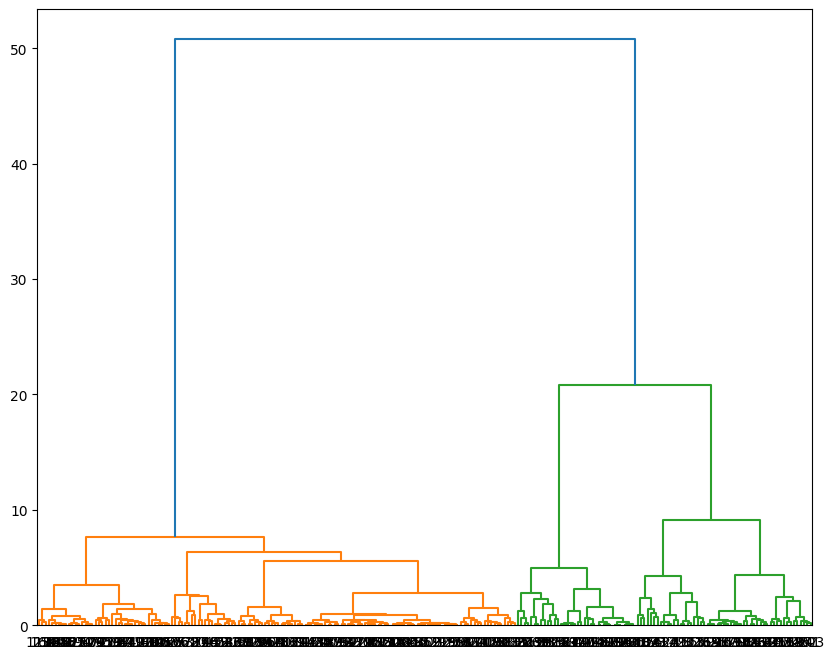

In [193]:
#Hierarchical Clustering using ward
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

z=linkage(df,method='ward',metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [195]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=8, linkage='ward',metric = "euclidean").fit(df)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000000,0.198067,0.0,0.0,0.0,0.0,0.004157,0.029412,0.0,0.0,0.843629,0.0,2.0
1,0.000249,0.135285,0.0,0.0,0.0,0.0,0.005137,0.058824,0.0,0.0,0.839768,0.0,2.0
2,0.000498,0.291270,0.0,0.0,0.0,0.0,0.098509,0.117647,0.0,0.0,0.847732,0.0,2.0
3,0.000746,0.103764,0.0,0.0,0.0,0.0,0.011946,0.029412,0.0,0.0,0.837838,0.0,2.0
5,0.001244,0.115362,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836631,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.130597,0.203619,0.0,0.0,0.0,0.0,0.195561,0.500000,0.0,0.0,0.798986,0.0,NaN
523,0.131343,0.178680,0.0,0.0,0.0,0.0,0.047785,0.029412,0.0,0.0,0.798263,0.0,NaN
524,0.131592,0.770256,0.0,0.0,0.0,0.0,0.163139,0.323529,0.0,0.0,0.797539,1.0,NaN
525,0.131841,0.305612,0.0,0.0,0.0,0.0,0.118077,0.382353,0.0,0.0,0.796935,0.0,NaN


In [196]:
#grouping by cluster
cluster_means = df.groupby('clust').mean()
cluster_means

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0.0,0.031327,0.394642,0.0,0.422222,0.0,0.0,0.342170,0.333333,0.0,0.0,0.894402,0.533333
1.0,0.017537,0.289088,0.0,0.291667,0.0,0.0,0.245977,0.238971,0.0,0.0,0.837340,0.375000
2.0,0.029512,0.375841,0.0,0.296296,0.0,0.0,0.250689,0.316176,0.0,0.0,0.874987,0.305556
3.0,0.033657,0.274099,0.0,0.200000,0.0,0.0,0.147221,0.197059,0.0,0.0,0.865275,0.100000
4.0,0.028305,0.418935,0.0,0.261905,0.0,0.0,0.216158,0.319328,0.0,0.0,0.886169,0.214286
5.0,0.019921,0.371516,0.0,0.388889,0.0,0.0,0.404384,0.308824,0.0,0.0,0.869379,0.083333
6.0,0.033499,0.238669,0.0,0.055556,0.0,0.0,0.090461,0.181373,0.0,0.0,0.827843,0.333333
7.0,0.019652,0.255820,0.0,0.333333,0.0,0.0,0.271145,0.191176,0.0,0.0,0.905194,0.750000


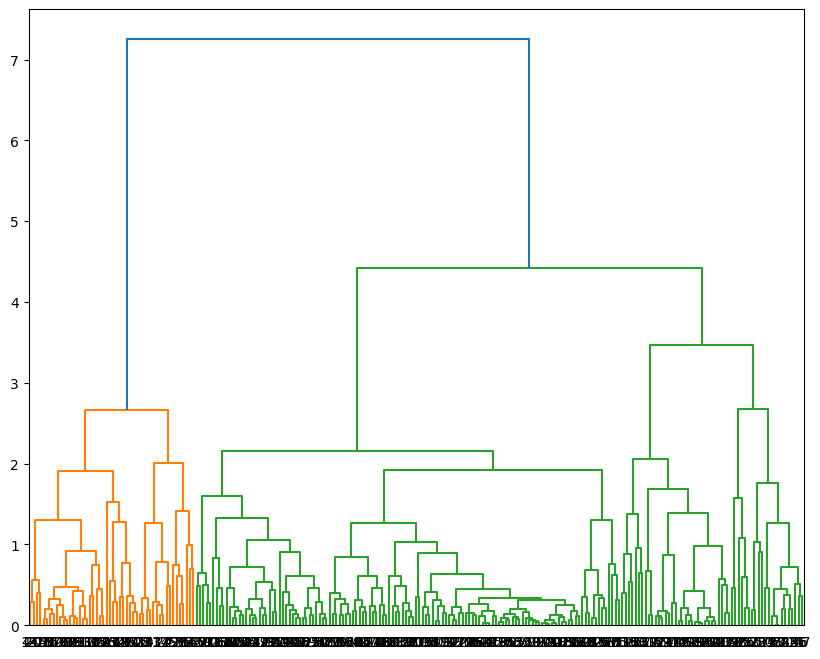

In [194]:

#Hierarchical Clustering using complete
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

z=linkage(df,method='complete',metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()


In [190]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=8, linkage='complete',metric = "euclidean").fit(df)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000000,0.198067,0.0,0.000000,0.0,0.0,0.004157,0.029412,0.0,0.0,0.843629,0.0,0.0
1,0.000249,0.135285,0.0,0.000000,0.0,0.0,0.005137,0.058824,0.0,0.0,0.839768,0.0,0.0
2,0.000498,0.291270,0.0,0.000000,0.0,0.0,0.098509,0.117647,0.0,0.0,0.847732,0.0,0.0
3,0.000746,0.103764,0.0,0.000000,0.0,0.0,0.011946,0.029412,0.0,0.0,0.837838,0.0,0.0
5,0.001244,0.115362,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836631,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,0.276368,0.172683,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.683277,0.0,NaN
1101,0.276617,0.596600,0.0,0.666667,0.0,0.0,0.257347,0.294118,0.0,0.0,0.660111,0.0,NaN
1104,0.277363,0.337719,0.0,0.666667,0.0,0.0,0.302384,0.382353,0.0,0.0,0.687741,0.0,NaN
1107,0.278109,0.158856,0.0,0.000000,0.0,0.0,0.081952,0.088235,0.0,0.0,0.685449,0.0,NaN


In [191]:
#grouping by cluster
cluster_means = df.groupby('clust').mean()
cluster_means

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0.0,0.069708,0.332636,0.0,0.268817,0.0,0.0,0.225448,0.276328,0.0,0.0,0.897764,0.322581
1.0,0.046725,0.393141,0.0,0.222222,0.0,0.0,0.211748,0.312092,0.0,0.0,0.841142,0.222222
2.0,0.025522,0.405397,0.0,0.533333,0.0,0.0,0.458107,0.364706,0.0,0.0,0.908229,0.400000
3.0,0.079095,0.326948,0.0,0.217949,0.0,0.0,0.204785,0.253394,0.0,0.0,0.893804,0.269231
4.0,0.057562,0.383352,0.0,0.200000,0.0,0.0,0.171384,0.202941,0.0,0.0,0.888127,0.300000
5.0,0.024491,0.434776,0.0,0.393939,0.0,0.0,0.306157,0.328877,0.0,0.0,0.889402,0.272727
6.0,0.034755,0.317621,0.0,0.142857,0.0,0.0,0.185980,0.214286,0.0,0.0,0.873156,0.142857
7.0,0.076726,0.319649,0.0,0.250000,0.0,0.0,0.232082,0.292279,0.0,0.0,0.903060,0.312500


# K-Means clustering

In [198]:
#applyimg PCA
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Now apply PCA to the imputed data
pca = PCA(n_components=i)  # Assuming 'i' is defined
pca_values = pca.fit_transform(df_imputed)
pca_values

array([[-7.36644552e-01, -5.60363712e-01,  2.93992140e-02, ...,
         6.70582003e-31,  3.19836608e-34,  1.07913947e-17],
       [-7.36345640e-01, -5.64131638e-01,  4.23015706e-02, ...,
         6.60563263e-31,  1.90225541e-33,  4.22957776e-18],
       [-7.40169908e-01, -4.77399226e-01, -4.65251444e-02, ...,
        -1.28373438e-30, -4.99105531e-32, -3.23427173e-17],
       ...,
       [-2.14689646e-02,  3.41322305e-01,  5.25297477e-01, ...,
        -9.25981337e-31, -2.04599980e-31, -1.25068955e-17],
       [ 1.65790587e-02, -3.59700222e-01, -1.10474687e-01, ...,
        -6.45725831e-31, -1.35119293e-31, -7.15112931e-17],
       [-4.76199159e-02,  1.06111100e+00,  1.01796893e-01, ...,
         3.72372772e-30, -6.30487921e-32,  6.54705778e-17]])

In [199]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([7.49749741e-01, 1.33511665e-01, 7.65314767e-02, 2.15377770e-02,
       1.28577441e-02, 3.21717671e-03, 2.02119479e-03, 5.73224588e-04,
       4.01187034e-33, 7.05213556e-34, 0.00000000e+00])

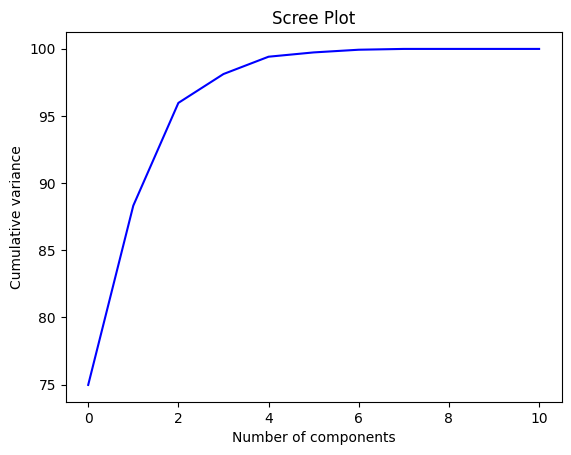

In [202]:
# Cumulative variance
var1 = np.cumsum(np.round(var, decimals=4) * 100)
var1

# Variance plot for PCA components obtained
plt.plot(var1, color="Blue")
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance') #for each component
plt.title('Scree Plot')
plt.show()

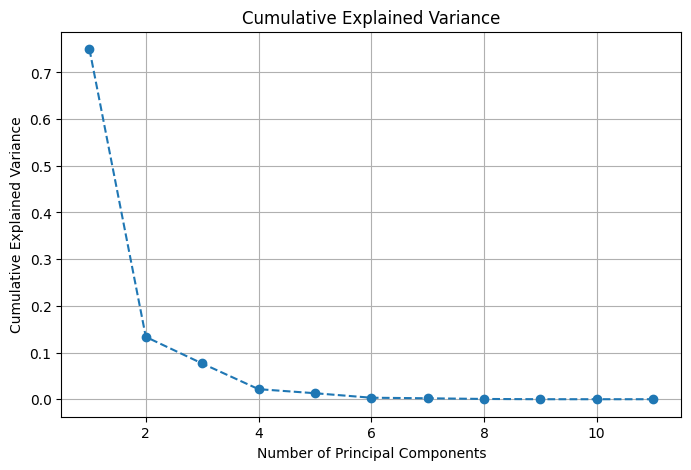

In [203]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [204]:
pca_values[:,0:4]

array([[-7.36644552e-01, -5.60363712e-01,  2.93992140e-02,
        -6.05369659e-02],
       [-7.36345640e-01, -5.64131638e-01,  4.23015706e-02,
        -1.15916213e-01],
       [-7.40169908e-01, -4.77399226e-01, -4.65251444e-02,
         8.74762224e-03],
       [-7.35614367e-01, -5.75430890e-01,  5.67309051e-02,
        -1.47947595e-01],
       [ 2.26155922e+00, -4.49947553e-01,  8.00674468e-02,
        -1.19075423e-01],
       [-7.75754724e-01,  3.75557284e-01, -7.05762582e-01,
        -9.39999284e-03],
       [ 1.24614505e+00, -1.15583451e-01, -2.25839399e-01,
        -9.93764925e-02],
       [ 1.24042551e+00,  9.40502369e-03, -3.24842079e-01,
        -8.01214664e-02],
       [-7.40922068e-01, -4.67795991e-01, -5.75230762e-02,
         2.82979597e-02],
       [ 2.63640939e-01, -5.39232978e-01,  6.59749503e-02,
        -1.22891336e-01],
       [-1.77017167e+00,  5.62966479e-02,  7.82381274e-01,
        -3.31051589e-02],
       [-2.80350244e+00,  8.35408437e-01,  1.02469997e-01,
      

In [205]:
#final dataset after applying PCA
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:4],columns=['pc1','pc2','pc3','pc4']), df[['ID#']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,ID#
0,-0.736645,-0.560364,0.029399,-0.060537,0.000000
1,-0.736346,-0.564132,0.042302,-0.115916,0.000249
2,-0.740170,-0.477399,-0.046525,0.008748,0.000498
3,-0.735614,-0.575431,0.056731,-0.147948,0.000746
4,2.261559,-0.449948,0.080067,-0.119075,NaN
...,...,...,...,...,...
520,NaN,NaN,NaN,NaN,0.130597
523,NaN,NaN,NaN,NaN,0.131343
524,NaN,NaN,NaN,NaN,0.131592
525,NaN,NaN,NaN,NaN,0.131841


In [206]:
finalDf.corr()

,pc1,pc2,pc3,pc4,ID#
pc1,1.000000e+00,-3.630912e-15,2.529020e-16,-1.226235e-15,-0.157211
pc2,-3.630912e-15,1.000000e+00,2.498880e-16,-1.547215e-15,-0.139338
pc3,2.529020e-16,2.498880e-16,1.000000e+00,8.475877e-16,0.095782
pc4,-1.226235e-15,-1.547215e-15,8.475877e-16,1.000000e+00,0.065574
ID#,-1.572110e-01,-1.393377e-01,9.578249e-02,6.557378e-02,1.000000


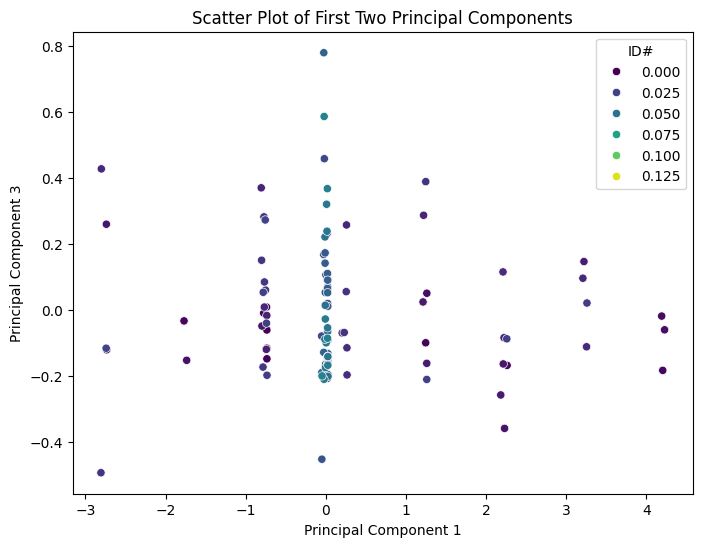

In [207]:
# Scatter plot of the  principal components, colored by wine type
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc4', hue='ID#', data=finalDf, palette='viridis')
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.show()

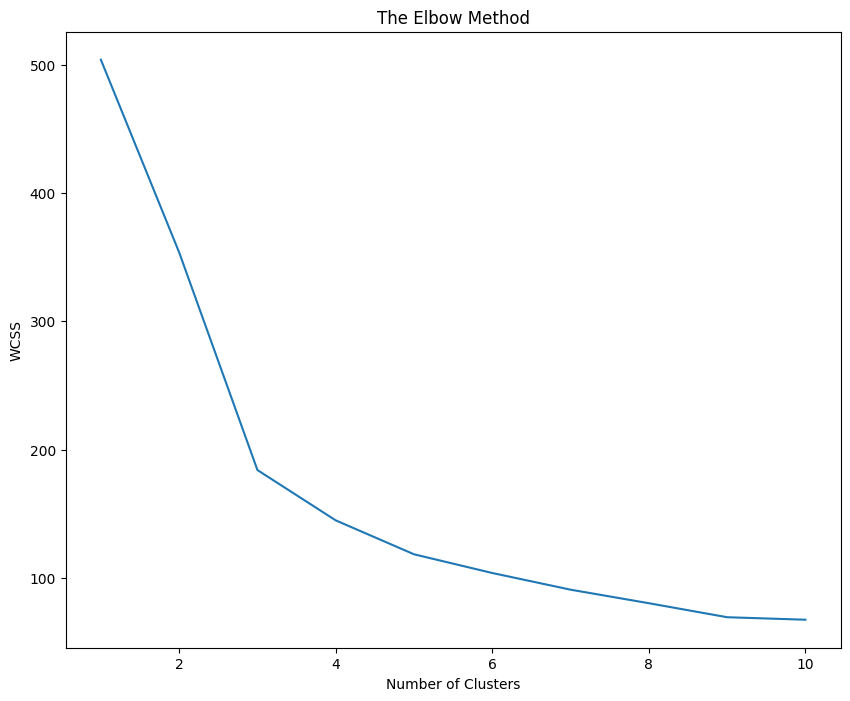

In [209]:
# K Means model
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    # Fit on the imputed data
    clf.fit(df_imputed)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [211]:
#predicting
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(df_imputed)
y_kmeans


array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0,
       1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0,
       1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [212]:
print(f"clf.cluster_centers_ : {clf.cluster_centers_}" )
print(f"clf.labels_ : {clf.labels_}" )
print(f"clf.inertia_ : {clf.inertia_}" )

clf.cluster_centers_ : [[0.02653039 0.35792782 0.         0.37681159 0.         0.
  0.30871186 0.30051151 0.         0.         0.8745541  0.47826087
  0.34782609]
 [0.02357531 0.31424934 0.         0.28787879 0.         0.
  0.29454337 0.2526738  0.         0.         0.86456322 0.27272727
  5.63636364]
 [0.07491267 0.34453896 0.         0.24468085 0.         0.
  0.21070027 0.27831665 0.         0.         0.89778159 0.28191489
  2.72087133]]
clf.labels_ : [2 2 2 2 1 2 2 2 2 2 0 0 1 0 1 2 0 2 1 1 2 0 1 1 2 0 0 1 0 1 0 0 2 1 2 2 2
 1 2 1 2 2 2 0 1 0 2 2 1 2 0 2 2 2 2 1 2 0 2 0 1 2 0 2 1 1 2 1 2 2 2 2 2 0
 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 2 1 2 0 2 2 0 2 2 1 1 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]
clf.inertia_ : 186.02053089882233


In [213]:
# converting numpy array into pandas series object
md=pd.Series(y_kmeans)
df['clust']=md # creating a  new column and assigning it to new column
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000000,0.198067,0.0,0.0,0.0,0.0,0.004157,0.029412,0.0,0.0,0.843629,0.0,2.0
1,0.000249,0.135285,0.0,0.0,0.0,0.0,0.005137,0.058824,0.0,0.0,0.839768,0.0,2.0
2,0.000498,0.291270,0.0,0.0,0.0,0.0,0.098509,0.117647,0.0,0.0,0.847732,0.0,2.0
3,0.000746,0.103764,0.0,0.0,0.0,0.0,0.011946,0.029412,0.0,0.0,0.837838,0.0,2.0
5,0.001244,0.115362,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836631,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.130597,0.203619,0.0,0.0,0.0,0.0,0.195561,0.500000,0.0,0.0,0.798986,0.0,NaN
523,0.131343,0.178680,0.0,0.0,0.0,0.0,0.047785,0.029412,0.0,0.0,0.798263,0.0,NaN
524,0.131592,0.770256,0.0,0.0,0.0,0.0,0.163139,0.323529,0.0,0.0,0.797539,1.0,NaN
525,0.131841,0.305612,0.0,0.0,0.0,0.0,0.118077,0.382353,0.0,0.0,0.796935,0.0,NaN


In [214]:
#groupimg by cluster
df.groupby(df.clust).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0.0,0.011585,0.271174,0.0,0.190476,0.0,0.0,0.152892,0.163866,0.0,0.0,0.879137,0.000000
1.0,0.011532,0.364986,0.0,0.357143,0.0,0.0,0.269085,0.264706,0.0,0.0,0.861090,0.357143
2.0,0.031924,0.360407,0.0,0.297619,0.0,0.0,0.265073,0.302871,0.0,0.0,0.874816,0.321429


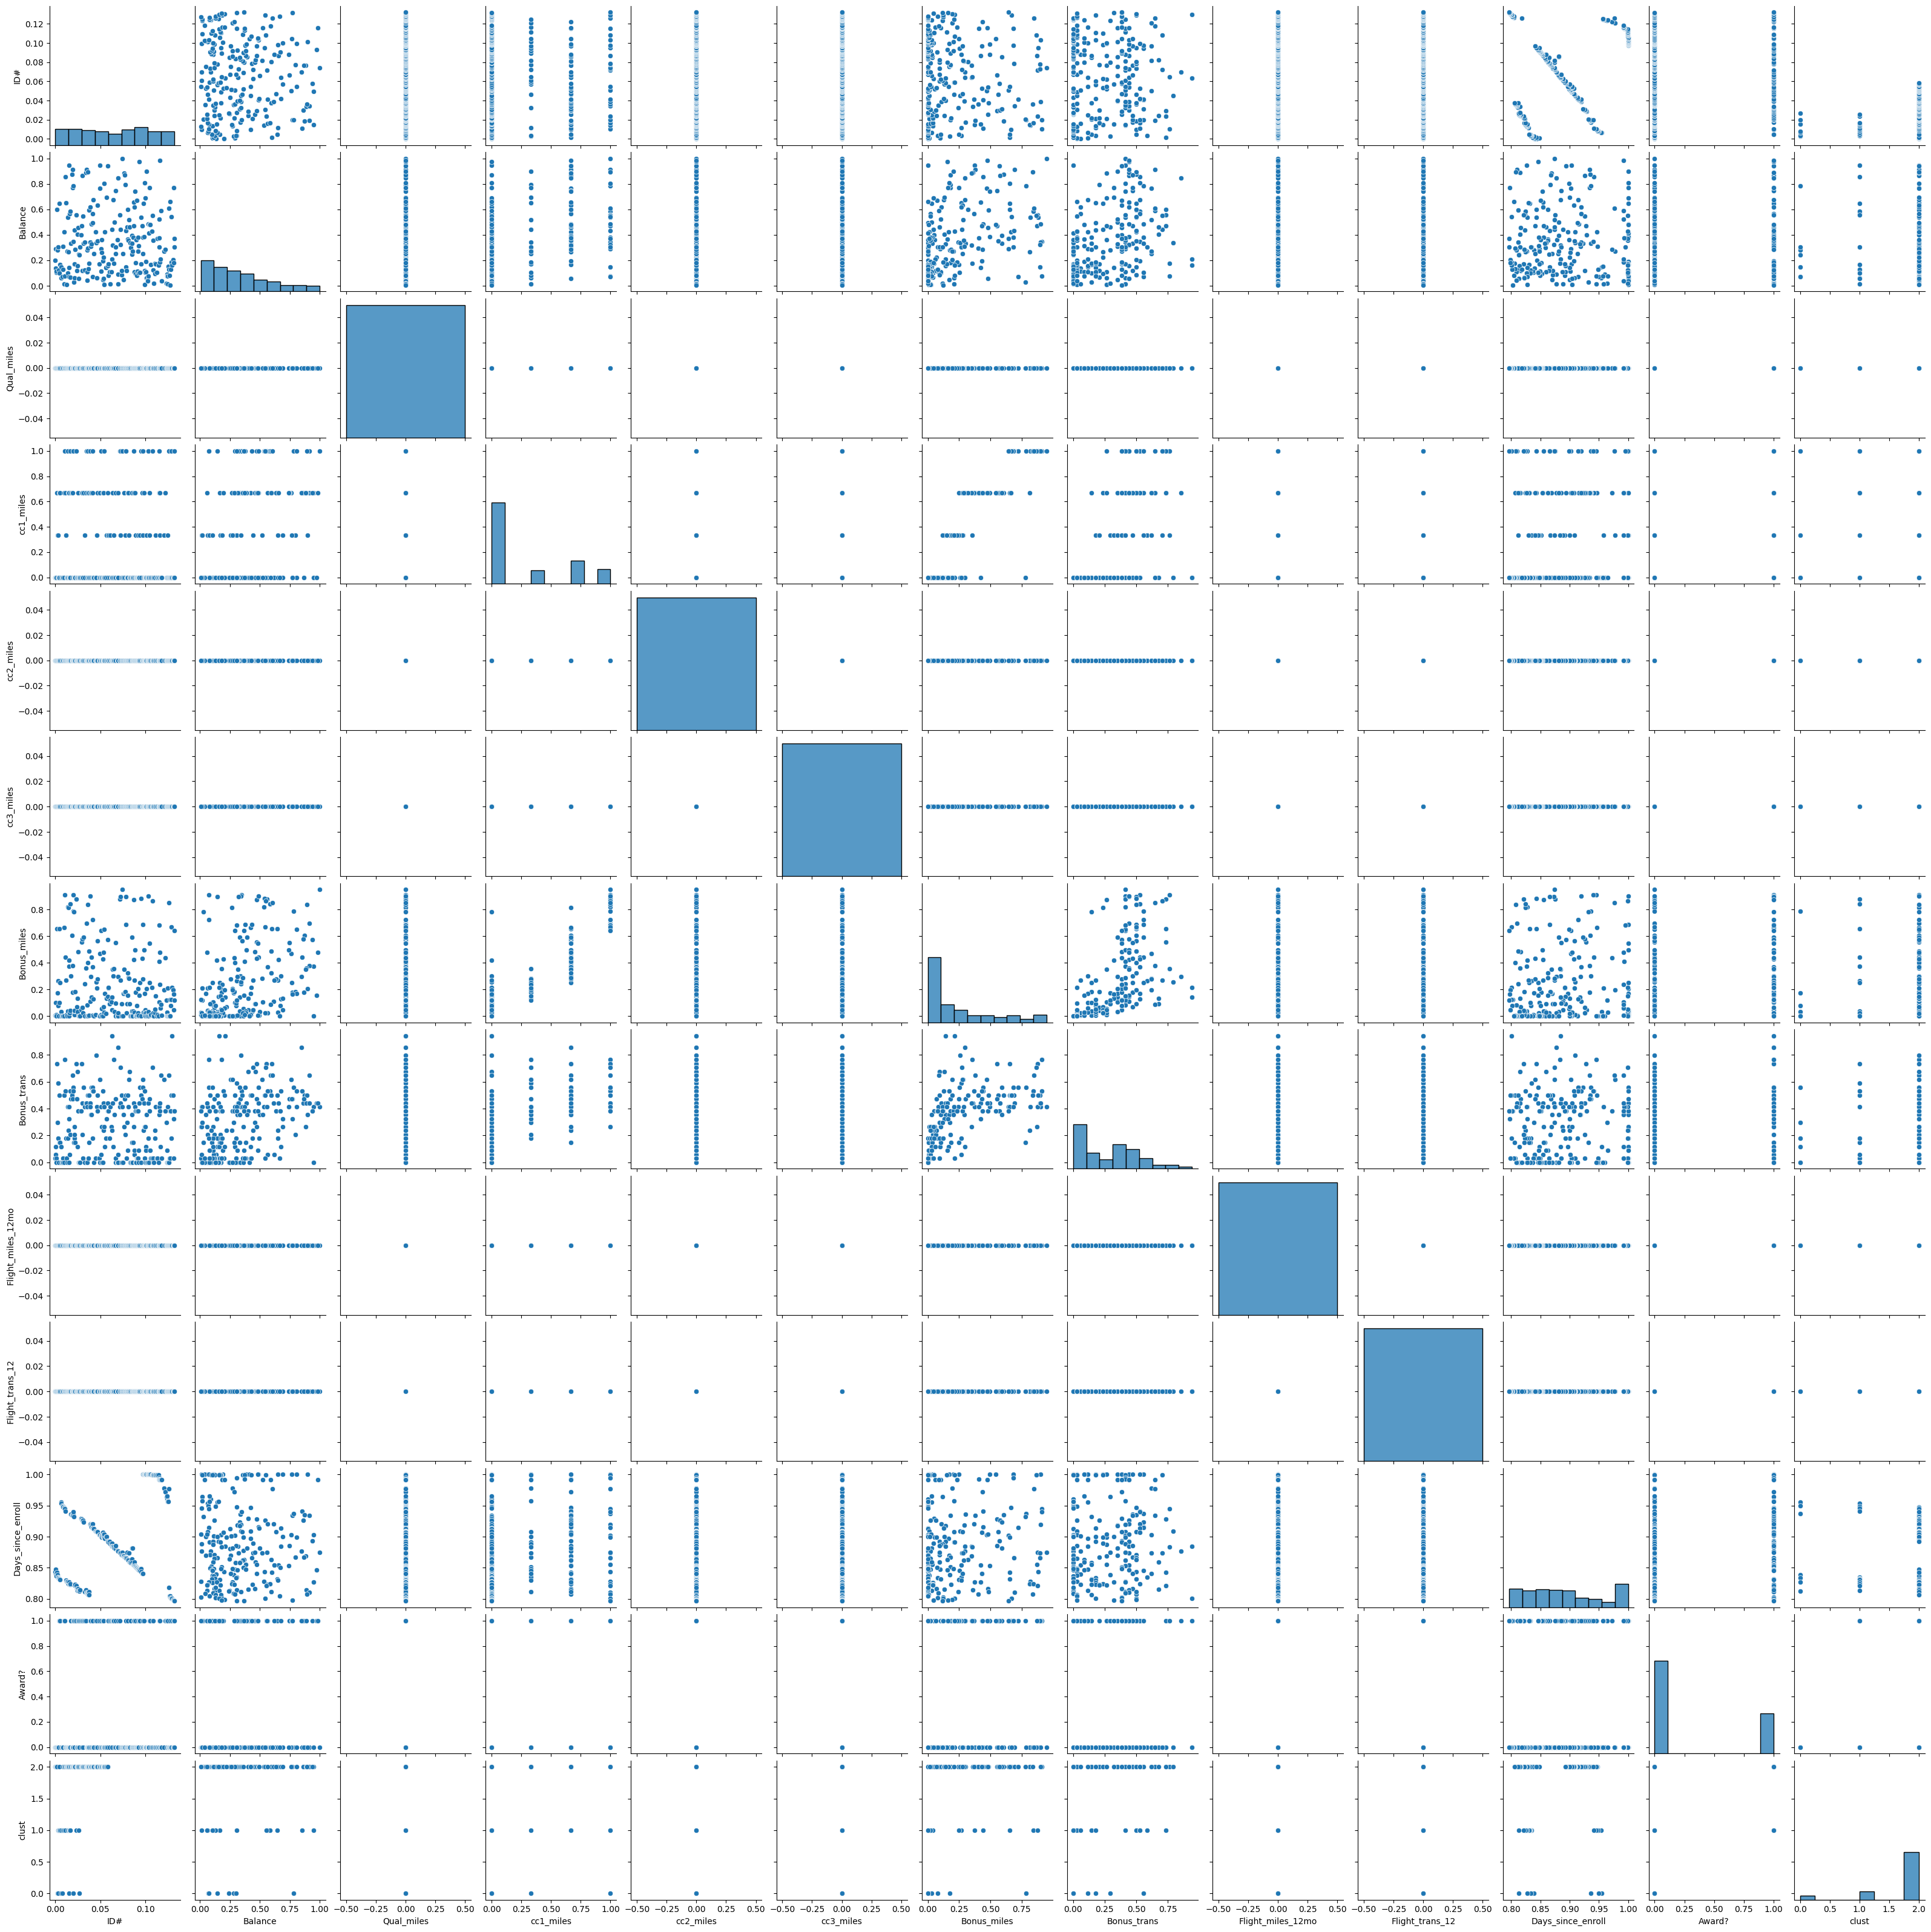

In [215]:
# prompt: pairplot

# Pair plot
sns.pairplot(df)
plt.show()

In [216]:
#correlation
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
ID#,1.000000,-0.044615,NaN,-0.086273,NaN,NaN,-0.103042,-0.031278,NaN,NaN,0.344081,-0.004633,0.444338
Balance,-0.044615,1.000000,NaN,0.442504,NaN,NaN,0.432305,0.412616,NaN,NaN,-0.008716,0.000770,0.064372
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.086273,0.442504,NaN,1.000000,NaN,NaN,0.924245,0.617525,NaN,NaN,0.010610,0.291969,0.030398
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.103042,0.432305,NaN,0.924245,NaN,NaN,1.000000,0.646964,NaN,NaN,-0.006105,0.297643,0.076267
Bonus_trans,-0.031278,0.412616,NaN,0.617525,NaN,NaN,0.646964,1.000000,NaN,NaN,-0.015015,0.192601,0.150596
Flight_miles_12mo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight_trans_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


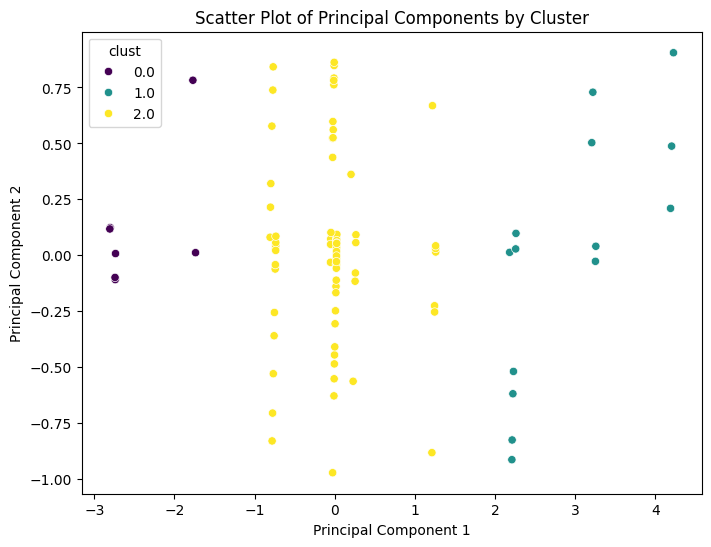

In [220]:
# Scatter plot of distint variables
plt.figure(figsize=(8, 6))
# Add 'clust' column to finalDf from the original DataFrame df
finalDf['clust'] = df['clust']
sns.scatterplot(x='pc1', y='pc3', hue='clust', data=finalDf, palette='viridis')
plt.title('Scatter Plot of Principal Components by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

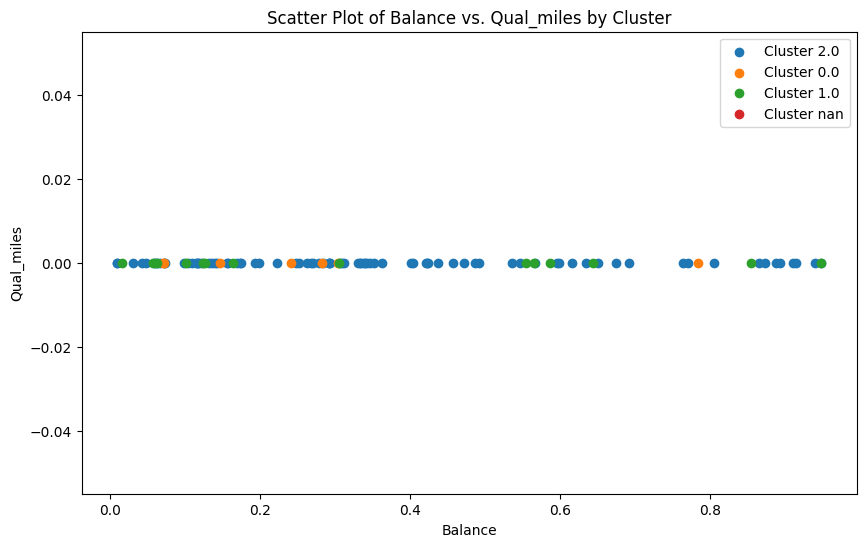

In [222]:
#  scatter plot
plt.figure(figsize=(10, 6))
for cluster in df['clust'].unique():
    cluster_data = df[df['clust'] == cluster]
    plt.scatter(cluster_data['Balance'], cluster_data['Qual_miles'], label=f'Cluster {cluster}')

plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('Scatter Plot of Balance vs. Qual_miles by Cluster')
plt.legend()
plt.show()

# DBSCAN

In [224]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Now apply DBSCAN to the imputed data
dbscan = DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(df_imputed)

DBSCAN(eps=0.475)

In [225]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  1, -1,  1,  2,  3, -1, -1,  1,  2,  1,  2,
        0,  3, -1,  3, -1,  0,  0,  0,  2,  0,  0, -1,  0,  1,  2,  0, -1,
        3,  0,  0,  0, -1,  3, -1,  0,  0,  0,  3, -1,  0,  0,  0,  3, -1,
        0,  1,  3,  3,  0,  3,  3,  0,  3,  3,  3,  3,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  3,  3,  0,  0,  3,  3,  0,  0,  0,  3,  0,  3,
        0,  0,  3,  0,  0,  3,  0,  0,  0,  3,  0,  0,  3,  0,  0,  0,  0,
        0,  3,  0,  3,  3,  0,  3,  3,  0,  0,  3,  3,  3,  0,  3,  0,  0,
        0,  0,  3,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,
        0,  0,  3,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  3,  0,  3,
        0,  0,  3,  0,  0,  0,  0,  0,  0,  3,  0,  0,  3,  3,  0,  0,  0,
        0,  3,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  3,  3,  3,  0,  0,  0,  3,  3,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  3,  3,  0,  0,  0,  0,  3,  3,  0,  0,  3,  3,  0,  0,  0,
        0,  3,  0,  0,  0

In [226]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [227]:
dff = pd.concat([df,cl],axis=1)
dff

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,cluster
0,0.000000,0.198067,0.0,0.0,0.0,0.0,0.004157,0.029412,0.0,0.0,0.843629,0.0,2.0,0.0
1,0.000249,0.135285,0.0,0.0,0.0,0.0,0.005137,0.058824,0.0,0.0,0.839768,0.0,2.0,0.0
2,0.000498,0.291270,0.0,0.0,0.0,0.0,0.098509,0.117647,0.0,0.0,0.847732,0.0,2.0,0.0
3,0.000746,0.103764,0.0,0.0,0.0,0.0,0.011946,0.029412,0.0,0.0,0.837838,0.0,2.0,0.0
5,0.001244,0.115362,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.836631,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [228]:
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
ID#,1.000000,-0.044615,NaN,-0.086273,NaN,NaN,-0.103042,-0.031278,NaN,NaN,0.344081,-0.004633,0.444338
Balance,-0.044615,1.000000,NaN,0.442504,NaN,NaN,0.432305,0.412616,NaN,NaN,-0.008716,0.000770,0.064372
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.086273,0.442504,NaN,1.000000,NaN,NaN,0.924245,0.617525,NaN,NaN,0.010610,0.291969,0.030398
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.103042,0.432305,NaN,0.924245,NaN,NaN,1.000000,0.646964,NaN,NaN,-0.006105,0.297643,0.076267
Bonus_trans,-0.031278,0.412616,NaN,0.617525,NaN,NaN,0.646964,1.000000,NaN,NaN,-0.015015,0.192601,0.150596
Flight_miles_12mo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight_trans_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
plt.style.use('classic')

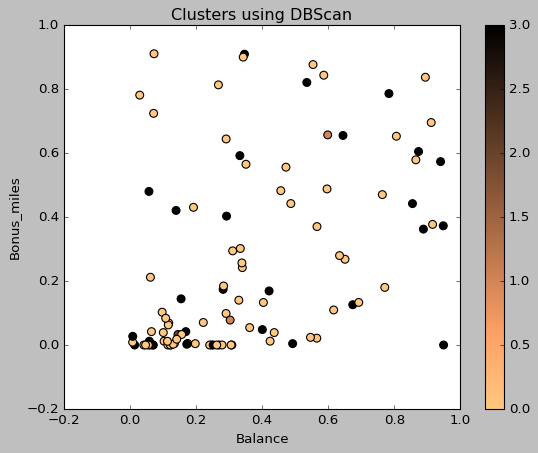

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dff = dff[dff['cluster'] != -1]

# Reset index to ensure continuous index values for plotting
dff = dff.reset_index(drop=True)

# Create the scatter plot with the filtered data
dff.plot(x="Balance", y="Bonus_miles", c=dff['cluster'], kind="scatter", s=50, cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')
plt.show()